In [6]:
# --- 📦 IMPORT LIBRARY ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# --- 📂 LOAD DATA ---
df = pd.read_csv('../data/wine_food_pairings.csv')

In [7]:

# --- CEK DATA ---
df.head()
df.info()
df.describe(include='all')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34933 entries, 0 to 34932
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   wine_type        34933 non-null  object
 1   wine_category    34933 non-null  object
 2   food_item        34933 non-null  object
 3   food_category    34933 non-null  object
 4   cuisine          34933 non-null  object
 5   pairing_quality  34933 non-null  int64 
 6   quality_label    34933 non-null  object
 7   description      34933 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


,wine_type,wine_category,food_item,food_category,cuisine,pairing_quality,quality_label,description
count,34933,34933,34933,34933,34933,34933.000000,34933,34933
unique,29,6,38,12,17,NaN,5,21
top,Sauternes,Red,fondue,Red Meat,Mexican,NaN,Neutral,Heuristic pairing assessment.
freq,2452,12908,2246,8149,2089,NaN,8108,13308
mean,NaN,NaN,NaN,NaN,NaN,3.015115,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.409591,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN


In [10]:
df.columns.tolist()

['wine_type',
 'wine_category',
 'food_item',
 'food_category',
 'cuisine',
 'pairing_quality',
 'quality_label',
 'description']

In [11]:
# --- DATA CLEANING ---
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.drop_duplicates(inplace=True)

# Pastikan kolom teks dibersihkan dari spasi dan huruf besar
df['food_item'] = df['food_item'].str.strip().str.lower()
df['wine_type'] = df['wine_type'].str.strip().str.lower()
df['cuisine'] = df['cuisine'].str.strip().str.lower()

# Cek hasil pembersihan awal
df.head()




,wine_type,wine_category,food_item,food_category,cuisine,pairing_quality,quality_label,description
0,syrah/shiraz,Red,smoked sausage,Smoky BBQ,spanish,2,Poor,Heuristic pairing assessment.
1,grenache,Red,charcuterie board,Salty Snack,french,3,Neutral,Heuristic pairing assessment.
2,madeira,Fortified,lemon tart,Dessert,french,4,Good,Acidic wine balances acidic food.
3,cabernet sauvignon,Red,roast lamb,Red Meat,mexican,5,Excellent,Tannic red complements red meat fat.
4,viognier,White,duck à l’orange,Poultry,vietnamese,2,Poor,Heuristic pairing assessment.


In [13]:
# --- ANALISIS DASAR ---
# --- ANALISIS DASAR ---
print("Jumlah total pairing:", len(df))
print("Jumlah jenis wine unik:", df['wine_type'].nunique())
print("Jumlah makanan unik:", df['food_item'].nunique())
print("Jumlah kategori makanan unik:", df['food_category'].nunique())
print("Jumlah jenis masakan unik (cuisine):", df['cuisine'].nunique())



Jumlah total pairing: 34933
Jumlah jenis wine unik: 29
Jumlah makanan unik: 38
Jumlah kategori makanan unik: 12
Jumlah jenis masakan unik (cuisine): 17


/var/folders/y8/gwf2p9490h9016vz_2qbtqs40000gn/T/ipykernel_2550/739601992.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_wines.values, y=top_wines.index, palette='Purples_r')
/Users/kinder/Documents/projects_2025/wine_food_eda/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127815 (\N{GRAPES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


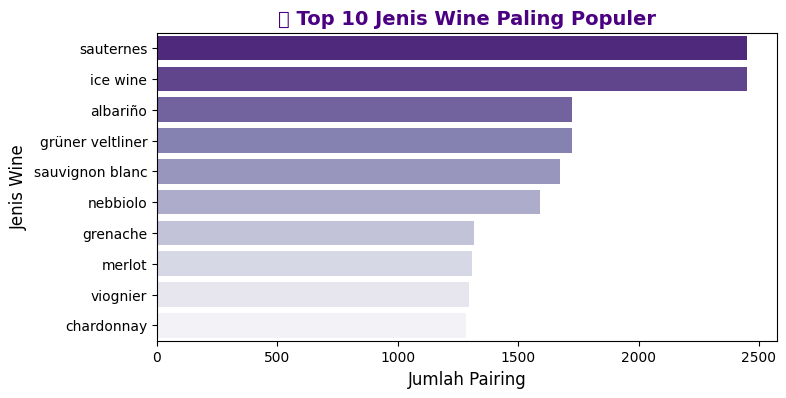

In [16]:
# --- 🍷 TOP WINE YANG PALING POPULER ---
top_wines = df['wine_type'].value_counts().head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_wines.values, y=top_wines.index, palette='Purples_r')
plt.title("🍇 Top 10 Jenis Wine Paling Populer", fontsize=14, fontweight='bold', color='#4B0082')
plt.xlabel("Jumlah Pairing", fontsize=12)
plt.ylabel("Jenis Wine", fontsize=12)
plt.show()



In [19]:
# --- 🍽️ KATEGORISASI MAKANAN ---
def categorize_food(food):
    food = str(food).lower()  # pastikan tipe datanya string
    if any(x in food for x in ['fish', 'shrimp', 'salmon']):
        return 'Seafood'
    elif any(x in food for x in ['chicken', 'beef', 'lamb', 'pork', 'duck']):
        return 'Meat'
    elif any(x in food for x in ['chocolate', 'cake', 'dessert', 'ice cream']):
        return 'Dessert'
    elif any(x in food for x in ['cheese']):
        return 'Cheese'
    elif any(x in food for x in ['spicy', 'curry']):
        return 'Spicy'
    else:
        return 'Other'

# Terapkan fungsi ke kolom
df['food_category_custom'] = df['food_item'].apply(categorize_food)

# Cek hasil kategorisasi
df['food_category_custom'].value_counts()



food_category_custom
Other      20284
Meat        5906
Cheese      4955
Seafood     1836
Dessert     1017
Spicy        935
Name: count, dtype: int64

/var/folders/y8/gwf2p9490h9016vz_2qbtqs40000gn/T/ipykernel_2550/3594290024.py:33: UserWarning: Glyph 127863 (\N{WINE GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/kinder/Documents/projects_2025/wine_food_eda/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127863 (\N{WINE GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


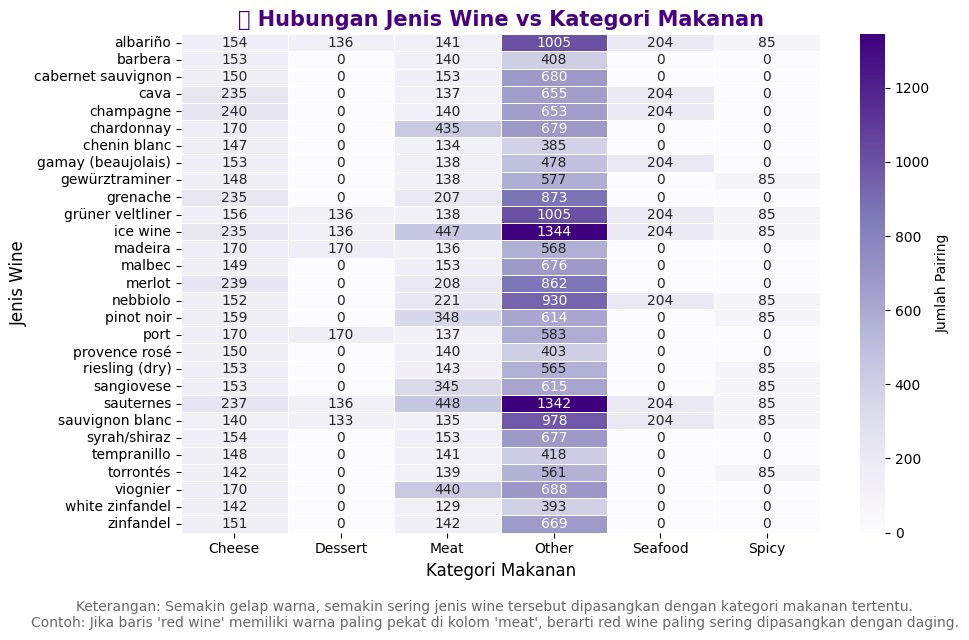

In [22]:
# --- 🔥 HEATMAP HUBUNGAN WINE - MAKANAN ---
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Buat tabel silang antara jenis wine dan kategori makanan
heatmap_data = pd.crosstab(df['wine_type'], df['food_category_custom'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    cmap='Purples',
    annot=True,
    fmt='d',
    linewidths=0.5,
    cbar_kws={'label': 'Jumlah Pairing'}
)

# Tambahkan judul dan label sumbu
plt.title('🍷 Hubungan Jenis Wine vs Kategori Makanan', fontsize=15, fontweight='bold', color='#4B0082')
plt.xlabel('Kategori Makanan', fontsize=12)
plt.ylabel('Jenis Wine', fontsize=12)

# Tambahkan keterangan di bawah grafik
plt.figtext(
    0.5, -0.05,
    "Keterangan: Semakin gelap warna, semakin sering jenis wine tersebut dipasangkan dengan kategori makanan tertentu.\n"
    "Contoh: Jika baris 'red wine' memiliki warna paling pekat di kolom 'meat', berarti red wine paling sering dipasangkan dengan daging.",
    wrap=True, horizontalalignment='center', fontsize=10, color='dimgray'
)

plt.tight_layout()
plt.show()


In [4]:
import pandas as pd

df = pd.read_csv("../data/wine_food_pairing.csv")

# Cek kolom relevan
print(df.columns)

# Preview top pairings untuk tiap wine
food_col = [c for c in df.columns if "food" in c.lower()][0]
wine_col = [c for c in df.columns if "wine" in c.lower()][0]

top_pairings = (
    df.groupby(wine_col)[food_col]
    .value_counts()
    .groupby(level=0)
    .head(3)
    .reset_index(name="count")
)

display(top_pairings.head(10))


Index(['wine_type', 'wine_category', 'food_item', 'food_category', 'cuisine',
       'pairing_quality', 'quality_label', 'description'],
      dtype='object')


,wine_type,food_item,count
0,Albariño,lemon tart,85
1,Albariño,mushroom risotto,85
2,Albariño,stir-fried tofu,85
3,Barbera,cheese platter,78
4,Barbera,beef stew,77
5,Barbera,fondue,77
6,Cabernet Sauvignon,bbq ribs,85
7,Cabernet Sauvignon,beef stew,85
8,Cabernet Sauvignon,grilled burger,85
9,Cava,charcuterie board,85
